## 예제 데이터로 암 진단 분류하기

### 1.라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

### 2.예시 데이터 생성

In [ ]:
np.random.seed(42)
data_size = 300
features = 10

X = np.random.randn(data_size,features) #300,10
y = (np.random.randn(data_size) > 0.5).astype(int)

columns = [f"feature{i}" for i in range(features)] # 0 ~ 9

In [ ]:
columns

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9']

In [ ]:
df = pd.DataFrame(X, columns=columns)
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


In [ ]:
df['label'] = y

In [ ]:
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,label
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,0
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,1
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,1


### 3.데이터 전처리

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(240, 10)

In [ ]:
X_test.shape

(60, 10)

In [ ]:
y_train.shape

(240,)

In [ ]:
y_test.shape

(60,)

In [ ]:
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_train[0]

array([ 0.16057398,  0.00304602,  0.43693817,  1.19064627,  0.94955414,
       -1.48489797, -2.55392113,  0.93431991, -1.3668787 , -0.2247654 ])

In [ ]:
X_train_scaled[0]

array([ 0.12704631, -0.08247099,  0.48683579,  1.21427839,  0.78326148,
       -1.45737458, -2.50413138,  0.90724522, -1.52258614, -0.3807814 ])

In [ ]:
X_test_scaled = scaler.transform(X_test)

### 4.분류 모델 정의 및 학습

In [ ]:
model = LogisticRegression()

In [ ]:
type(model)

In [ ]:
# 모델 학습
model.fit(X_train_scaled,y_train)

LogisticRegression()

### 5.분류 결과 예측 및 평가

In [ ]:
# 예측
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred.shape

(60,)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# 정확도(accuracy) 체크
# 맞은 것의 갯수 y <-> y_pred
#  accuracy_score , confusion_matrix , classification_report

accuracy = accuracy_score(y_test,y_pred)

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [ ]:
class_report = classification_report(y_test,y_pred)

In [ ]:
print("accuracy:", accuracy)
print("[Confusion Matrix]")
print(conf_matrix)
print("-"* 100)
print("[classification Report]")
print(class_report)

accuracy: 0.6666666666666666
[Confusion Matrix]
[[40  0]
 [20  0]]
----------------------------------------------------------------------------------------------------
[classification Report]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        40
           1       0.00      0.00      0.00        20

    accuracy                           0.67        60
   macro avg       0.33      0.50      0.40        60
weighted avg       0.44      0.67      0.53        60



### 6.결과 시각화

In [ ]:
X_test

array([[ 5.27958857e-04,  6.01206749e-01, -1.44385482e+00,
        -2.29618095e+00, -5.50536849e-01, -1.22071243e+00,
        -5.08140198e-01, -1.47780319e-01, -4.53248409e-01,
         1.45246753e+00],
       [ 9.64851633e-01,  1.61558282e+00, -1.23434887e+00,
        -5.92464259e-01, -2.64057570e-02,  2.80161159e-01,
        -8.09603520e-01,  4.24061044e-01, -4.73839347e-01,
        -1.44522709e-02],
       [ 7.91031947e-01, -9.09387455e-01,  1.40279431e+00,
        -1.40185106e+00,  5.86857094e-01,  2.19045563e+00,
        -9.90536325e-01, -5.66297730e-01,  9.96513651e-02,
        -5.03475654e-01],
       [-1.25040773e+00,  6.04515326e-01,  8.82333062e-01,
        -4.52090333e-01, -4.70042148e-01,  2.65878230e-01,
        -4.36719736e-01, -6.61326146e-02,  2.09972179e+00,
        -2.47025701e-01],
       [-1.84618786e+00, -9.29510860e-01, -1.49652926e+00,
        -6.50023934e-01, -8.34379698e-02, -1.44964522e+00,
        -9.21859813e-01, -1.00395737e+00,  2.07267329e-01,
         6.

In [ ]:
X_test[:, 0] ,X_test[:, 1]

array([ 0.60120675,  1.61558282, -0.90938745,  0.60451533, -0.92951086,
        0.5792915 , -0.99806063, -0.13737179,  0.54336019, -0.3492577 ,
       -0.42423633,  0.34644821, -1.88184905,  1.71937791, -1.86726519,
       -1.27957697,  1.09098043, -0.39333881,  0.97885805,  1.41222056,
       -0.33381949, -1.66858407, -0.20358036,  2.49299952, -0.64754181,
        2.29094257, -0.39164857,  0.48387665,  0.42097294,  0.77740735,
       -1.0265153 , -0.54685894,  0.35711257,  0.30982071,  0.46217267,
       -0.55118572,  0.74212749,  0.07685188,  0.60211832, -0.38508228,
        0.7906256 ,  0.50727403, -0.43973106,  0.24368721, -0.15567724,
       -0.67771537, -1.35267029,  1.66902153,  1.53803657,  0.95514232,
       -0.97837278,  0.01961666, -0.3493168 , -2.84854262, -0.47765745,
       -0.92638113, -0.02419561, -0.05952536, -1.51664255, -1.76843937])

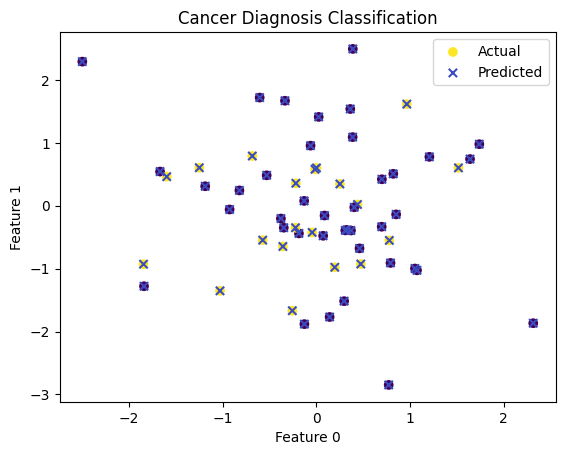

In [ ]:
# 시각화를 1,2번 특성에 대해서 시각화
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', label='Actual')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predicted')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.title('Cancer Diagnosis Classification')
plt.show()